In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# This notebook should be run under "scripts/"

import sys
import os

PATH = os.getcwd()
for _ in range(2):
    PATH = os.path.dirname(PATH)

if PATH not in sys.path:
    sys.path.append(PATH)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from BusinessAnalyticsProject.dataset.feature_engineering import train_test_split
from BusinessAnalyticsProject.models.model_selection import (
    create_pipeline,
    hyperparam_tuning,
    metrics,
    benchmark,
    OLS,RR
)
from BusinessAnalyticsProject.configs.RF import CONFIG as RF_CONFIG
from BusinessAnalyticsProject.models.model_interpretation import (
    create_benchmark_plot,
    create_benchmark_plot_with_p,
    create_feature_importance_plot
)

In [5]:
sns.set_theme()

## Read in Features

In [6]:
all_train_df = pd.read_csv("../data/processed/all_train.csv", index_col=[0], parse_dates=["Date"])
all_test_df = pd.read_csv("../data/processed/all_test.csv", index_col=[0], parse_dates=["Date"])

X_train, y_train, weights_train, X_test, y_test, weights_test = train_test_split(all_train_df)
X_train.shape, y_train.shape, weights_train.shape, X_test.shape, y_test.shape, weights_test.shape

((294132, 15), (294132,), (294132,), (127438, 15), (127438,), (127438,))

## Benchmark: WLS

In [7]:
pipeline_data = create_pipeline(
    None,
    None,
    if_to_one_hot=True
)
pipeline_data

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one_hot', OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000018C6AE51340>),
                                ('continuous',
                                 Pipeline(steps=[('dummy',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function identity at 0x0000018C685B59D0>))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000018C6AE51B20>)])

In [7]:
results, metrics_val = benchmark(
    pipeline_data,
    X_train, y_train, weights_train,
    X_test, y_test, weights_test
)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.543
Model:                            WLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     3570.
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:17:41   Log-Likelihood:            -3.4168e+06
No. Observations:              294132   AIC:                         6.834e+06
Df Residuals:                  294033   BIC:                         6.835e+06
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3619.4744    299.195     12.097      0.000    3033.060    4205.889
categorical__Dept_1          6234.9846    309.928     20.118      0.000    5627.534    6842.435
categorical__Dept_2          2.873e+04    309.928     92.686      0.000    2.81e+04    2.93e+04
categorical__Dept_3         -2055.0445    309.928     -6.631      0.000   -2662.495   -1447.594
categorical__Dept_4          1.289e+04    309.928     41.590      0.000    1.23e+04    1.35e+04
categorical__Dept_5          1.791e+04    312.121     57.384      0.000    1.73e+04    1.85e+04
categorical__Dept_6         -6370.7950    316.917    -20.102      0.000   -6991.944   -5749.646
categorical__Dept_7          1.764e+04    309.928     56.930      0.000     1.7e+04    1.83e+04
categorical__Dept_8           1.61e+04    309.928     51.932      0.000    1.55e+04    1.67e+04
categorical__Dept_9          5578.6118    312.622     17.845      0.000    4965.881    6191.343
categorical__Dept_10         4767.3661    309.928     15.382      0.000    4159.916    5374.816
categorical__Dept_11          957.7007    309.936      3.090      0.002     350.234    1565.168
categorical__Dept_12        -9691.5806    310.559    -31.207      0.000   -1.03e+04   -9082.895
categorical__Dept_13         1.661e+04    309.928     53.583      0.000     1.6e+04    1.72e+04
categorical__Dept_14         5759.4362    309.928     18.583      0.000    5151.986    6366.886
categorical__Dept_16        -4755.3760    309.928    -15.343      0.000   -5362.826   -4147.926
categorical__Dept_17        -2116.1603    309.945     -6.828      0.000   -2723.643   -1508.677
categorical__Dept_18        -1267.6636    321.585     -3.942      0.000   -1897.960    -637.367
categorical__Dept_19        -1.428e+04    366.752    -38.940      0.000    -1.5e+04   -1.36e+04
categorical__Dept_20        -8540.4807    320.189    -26.673      0.000   -9168.043   -7912.919
categorical__Dept_21        -8166.3316    309.928    -26.349      0.000   -8773.782   -7558.881
categorical__Dept_22        -2159.2644    328.387     -6.575      0.000   -2802.894   -1515.635
categorical__Dept_23         1.036e+04    325.132     31.849      0.000    9717.903     1.1e+04
categorical__Dept_24        -8383.5122    331.214    -25.311      0.000   -9032.682   -7734.343
categorical__Dept_25        -4480.2534    311.029    -14.405      0.000   -5089.862   -3870.645
categorical__Dept_26        -6360.6088    323.413    -19.667      0.000   -6994.489   -5726.728
categorical__Dept_27         -1.34e+04    328.493    -40.790      0.000    -1.4e+04   -1.28e+04
categorical__Dept_28        -1.327e+04    315.374    -42.086      0.000   -1.39e+04   -1.27e+04
categorical__Dept_29        -9452.5378    333.223    -28.367      0.000   -1.01e+04   -8799.430
categorical

In [10]:
metrics_val

{'r2_score': 0.5812441068602069,
 'rmse': 14314.446167444055,
 'rwmse': 5588188.544222239}

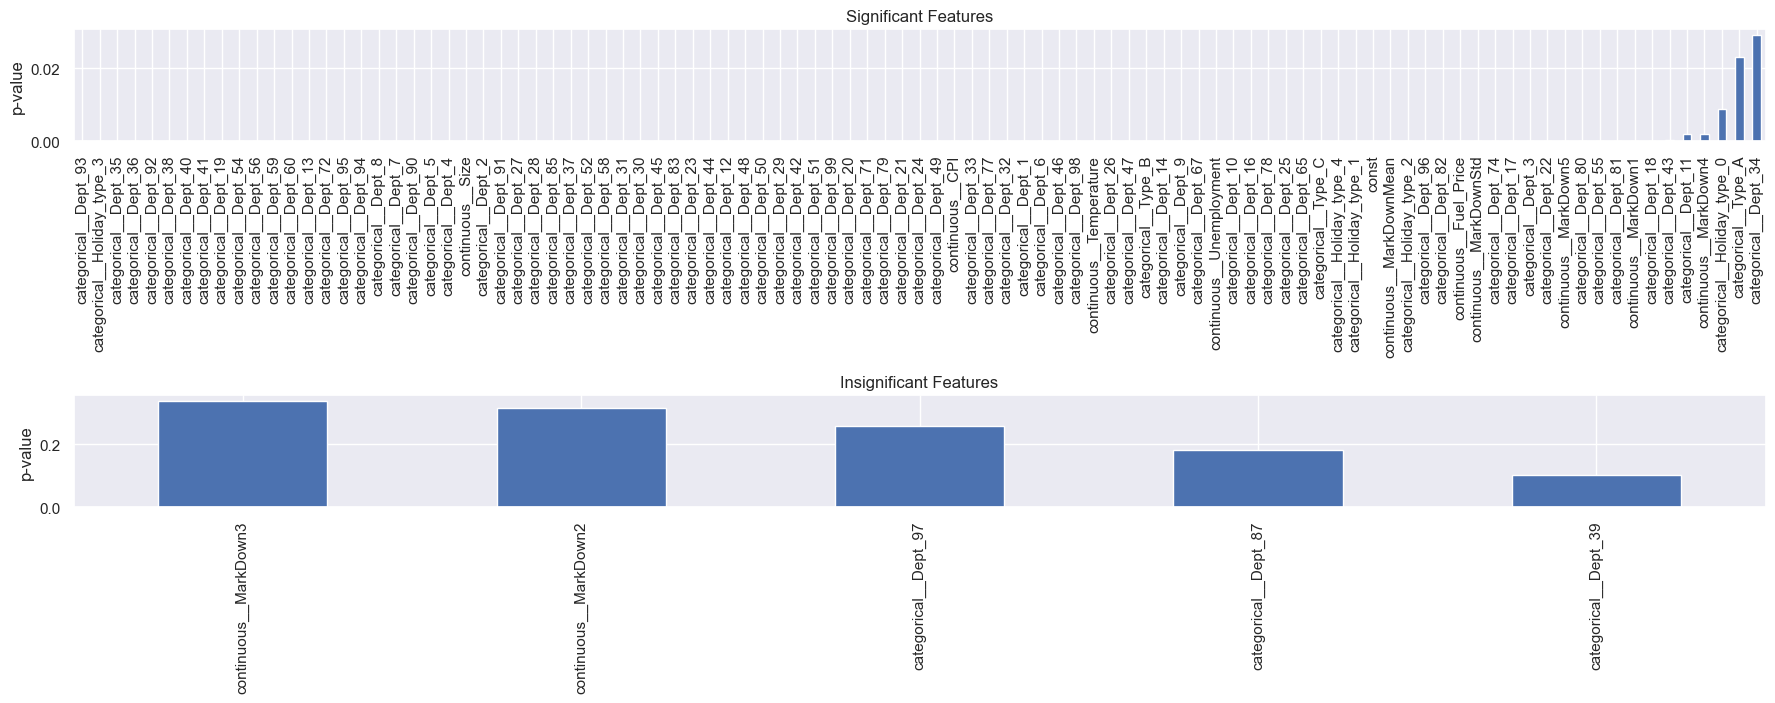

In [9]:
fig, axes = create_benchmark_plot(results)

# Ordinary Least Square (OLS) 普通最小二乘法

In [11]:
results, metrics_val, rho = OLS(
    pipeline_data,
    X_train, y_train, weights_train,
    X_test, y_test, weights_test
)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     4672.
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:18:01   Log-Likelihood:            -3.2328e+06
No. Observations:              294132   AIC:                         6.466e+06
Df Residuals:                  294033   BIC:                         6.467e+06
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        2845.6121    221.324     12.857      0.000    2411.823    3279.401
categorical__Dept_1          6803.6430    236.455     28.774      0.000    6340.198    7267.088
categorical__Dept_2          3.066e+04    236.455    129.676      0.000    3.02e+04    3.11e+04
categorical__Dept_3         -1214.9116    236.455     -5.138      0.000   -1678.357    -751.466
categorical__Dept_4          1.301e+04    236.455     55.042      0.000    1.26e+04    1.35e+04
categorical__Dept_5          1.013e+04    238.312     42.493      0.000    9659.634    1.06e+04
categorical__Dept_6         -8207.9736    242.604    -33.833      0.000   -8683.471   -7732.477
categorical__Dept_7          1.334e+04    236.455     56.437      0.000    1.29e+04    1.38e+04
categorical__Dept_8           1.73e+04    236.455     73.144      0.000    1.68e+04    1.78e+04
categorical__Dept_9          6917.8873    237.961     29.072      0.000    6451.491    7384.284
categorical__Dept_10         5451.3021    236.455     23.054      0.000    4987.857    5914.747
categorical__Dept_11         1870.6602    236.476      7.911      0.000    1407.174    2334.146
categorical__Dept_12        -8716.4383    237.001    -36.778      0.000   -9180.954   -8251.922
categorical__Dept_13         1.783e+04    236.455     75.405      0.000    1.74e+04    1.83e+04
categorical__Dept_14         2574.5825    236.455     10.888      0.000    2111.137    3038.028
categorical__Dept_16         1036.2112    236.455      4.382      0.000     572.766    1499.656
categorical__Dept_17        -2353.4330    236.496     -9.951      0.000   -2816.959   -1889.907
categorical__Dept_18        -4460.5464    262.022    -17.024      0.000   -4974.102   -3946.991
categorical__Dept_19        -1.356e+04    285.337    -47.506      0.000   -1.41e+04    -1.3e+04
categorical__Dept_20        -7986.8202    243.824    -32.757      0.000   -8464.708   -7508.933
categorical__Dept_21        -7628.8617    236.455    -32.263      0.000   -8092.307   -7165.417
categorical__Dept_22        -3565.6909    253.463    -14.068      0.000   -4062.471   -3068.911
categorical__Dept_23          1.05e+04    248.671     42.230      0.000       1e+04     1.1e+04
categorical__Dept_24        -8261.8275    254.395    -32.476      0.000   -8760.434   -7763.221
categorical__Dept_25        -3805.7361    237.148    -16.048      0.000   -4270.539   -3340.933
categorical__Dept_26        -6098.5312    248.075    -24.583      0.000   -6584.750   -5612.312
categorical__Dept_27        -1.285e+04    251.100    -51.170      0.000   -1.33e+04   -1.24e+04
categorical__Dept_28        -1.274e+04    240.944    -52.872      0.000   -1.32e+04   -1.23e+04
categorical__Dept_29        -9234.1302    255.863    -36.090      0.000   -9735.614   -8732.646
categorical

In [12]:
metrics_val

{'r2_score': 0.6528127240463191,
 'rmse': 13033.947995458706,
 'rwmse': 5127111.2533350205}

In [13]:
rho

array([0.3972994])

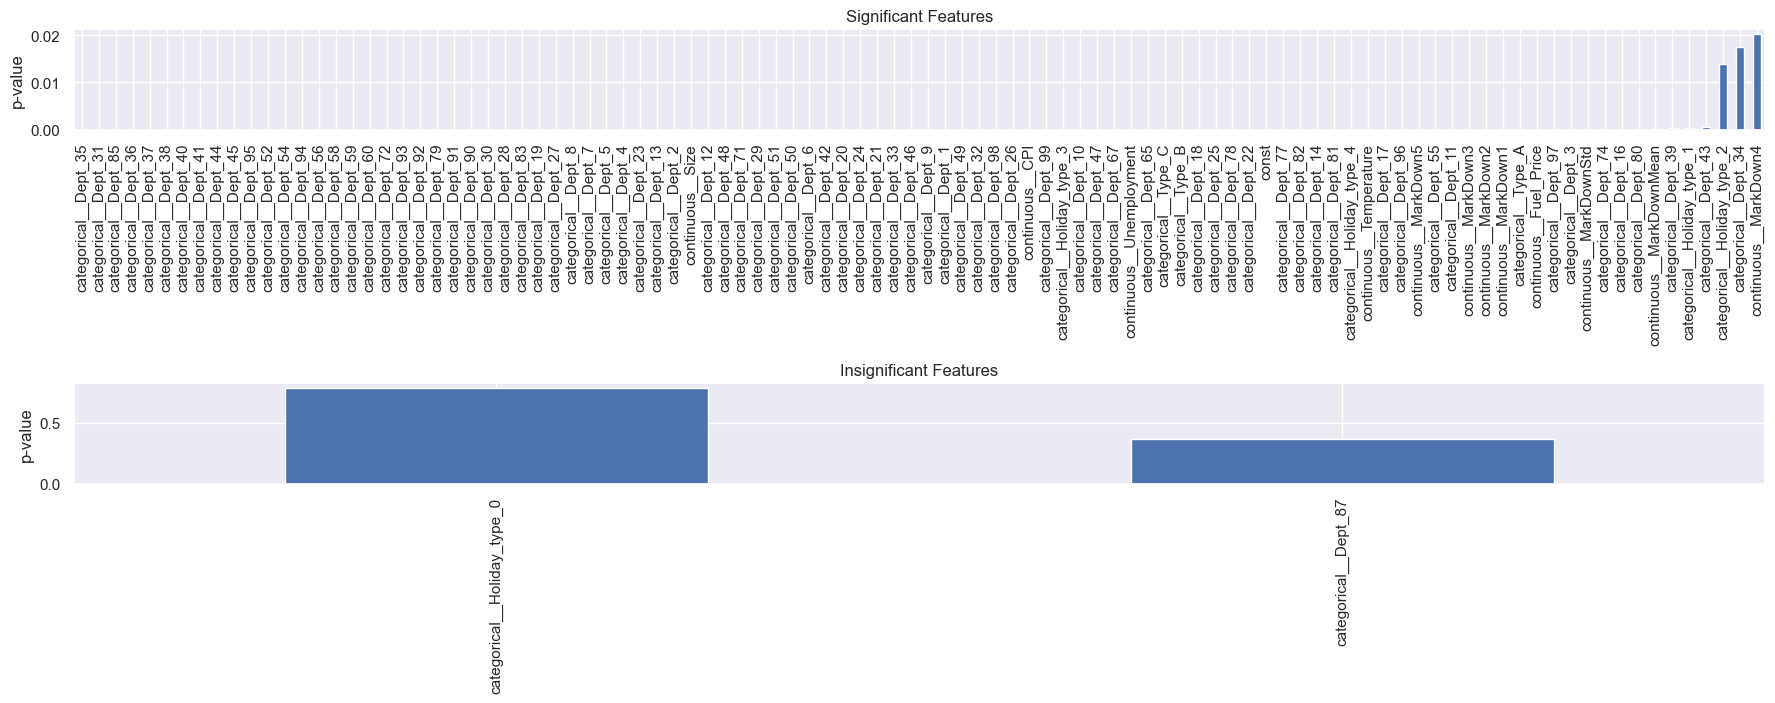

In [14]:
fig, axes = create_benchmark_plot(results)

# Ridge Regression 岭回归

In [13]:
results, metrics_val, pval, summary= RR(
    pipeline_data,
    X_train, y_train, weights_train,
    X_test, y_test, weights_test
)

Residuals:
        Min         1Q    Median        3Q        Max
-634794.357 -4673.2297 1422.0556 6264.3955 64920.7665


Coefficients:
                Estimate                  Std. Error           t value   p value
_intercept   4466.715410  4.901370e+16-3.130009e+16j  0.00000+0.00000j  1.000000
x1              0.000000 -2.205838e+16+6.954877e+16j  0.00000-0.00000j  1.000000
x2           6700.202884  4.671518e+08+1.355650e+08j  0.00000-0.00000j  0.999989
x3          30553.866463  1.469077e+08+1.198316e+08j  0.00010-0.00010j  0.999871
x4          -1316.570162  1.165041e+08+2.049115e+08j -0.00000+0.00000j  0.999996
x5          12910.055001  4.348658e+06+6.935957e+07j  0.00000-0.00020j  0.999852
x6          10022.524437  3.030300e+08+1.538648e+08j  0.00000-0.00000j  0.999976
x7          -8307.852579  3.313523e+08-3.615718e+07j -0.00000-0.00000j  0.999980
x8          13239.890384  5.205349e+08+1.979996e+08j  0.00000-0.00000j  0.999981
x9          17189.393773 -2.100050e+07-1.607679e+08j -0

In [15]:
metrics_val

{'r2_score': 0.6528328620030315,
 'rmse': 13033.569984936807,
 'rwmse': 5127020.552612349}

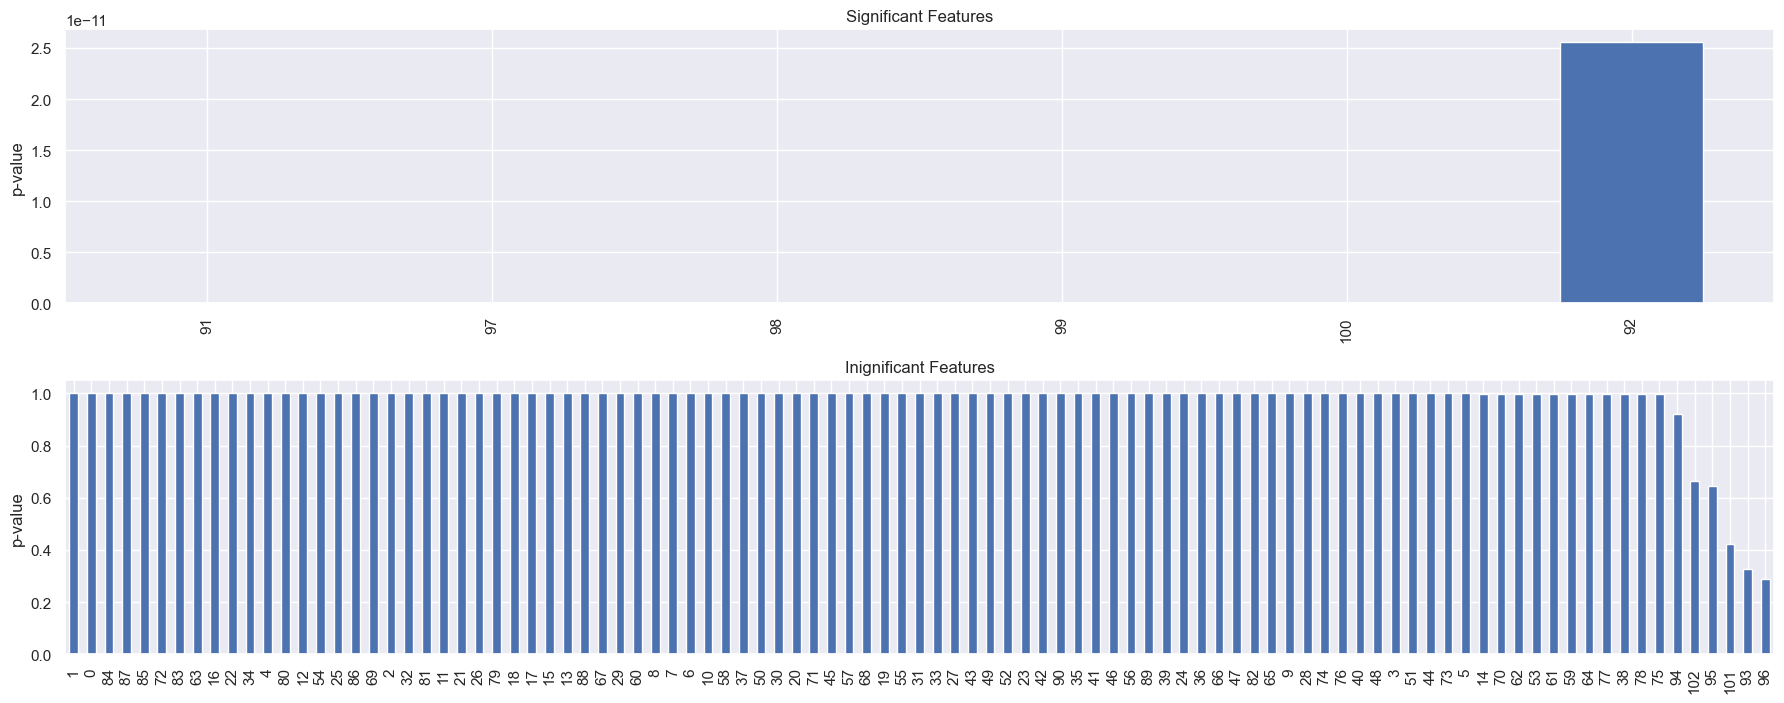

In [16]:
fig, axes = create_benchmark_plot_with_p(pval, results)